### use nlp environment

In [1]:
!python -V

Python 3.10.13


In [2]:
import requests
from bs4 import BeautifulSoup
import spacy
import yfinance as yf
import pandas as pd
import mplfinance as mpf

In [3]:
%pip list

Package                      Version        Editable project location
---------------------------- -------------- ---------------------------
absl-py                      2.1.0
accelerate                   0.26.0
aiohappyeyeballs             2.4.3
aiohttp                      3.11.8
aiosignal                    1.3.1
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-timeout                5.0.1
attrs                        24.2.0
beautifulsoup4               4.11.1
blis                         0.7.11
boto3                        1.35.71
botocore                     1.35.71
cachetools                   5.5.0
catalogue                    2.0.10
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
click                        7.1.2
colorama                     0.4.6
coloredlogs                  15.0.1
colourmap                    1.1.19
comm                         0.2.2
c

In [4]:
rss_url = "https://www.ft.com/myft/following/b2120a11-fbdf-494e-992c-1948e0e71113.rss"
#rss_url = "https://www.economist.com/finance-and-economics/rss.xml"
# rss_url = "https://www.economist.com/business/rss.xml"

In [5]:
nlp = spacy.load("en_core_web_sm")

C:\Users\marke\projects\nlp\.venv\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [6]:
response = requests.get(rss_url)

In [7]:
rss_feed = response.text

In [8]:
soup = BeautifulSoup(rss_feed, features="xml")

In [9]:
response = requests.get(rss_url)

if response.status_code == 200:
    rss_feed = response.text
    soup = BeautifulSoup(rss_feed, features="xml")
    entries = soup.find_all('title')
    if len(entries) > 0:
        title = entries[0]
        if title is not None:
            print(title.text)
        else:
            print("No title found in the first entry")
    else:
        print("No entry found in the RSS feed")
else:
    print("Failed to get RSS feed. Status code:", response.status_code)

myFT following


In [10]:
title = entries[5].text
print(title)

US sues KKR for allegedly shunning antitrust filings requirements


In [12]:
# split title into parts of speech tokens
processed_title = nlp(entries[5].text)
for token in processed_title:
    print(token)

US
sues
KKR
for
allegedly
shunning
antitrust
filings
requirements


In [13]:
# tag into 'parts of speech tokens'
processed_title = nlp(entries[5].text)
for token in processed_title:
    print(token.text, "---", token.pos_)

US --- PROPN
sues --- VERB
KKR --- PROPN
for --- ADP
allegedly --- ADV
shunning --- VERB
antitrust --- ADJ
filings --- NOUN
requirements --- NOUN


In [14]:
# tag into dependency graph
processed_title = nlp(entries[5].text)
for token in processed_title:
    print(token.text, "---", token.dep_)

US --- nsubj
sues --- ROOT
KKR --- dobj
for --- prep
allegedly --- advmod
shunning --- amod
antitrust --- amod
filings --- compound
requirements --- pobj


In [15]:
spacy.displacy.render(processed_title, style='dep',
jupyter=True, options={'distance': 120})

In [16]:
### entity extraction
spacy.displacy.render(processed_title,style='ent', jupyter=True,options={'distance': 120})

In [17]:
## Extract company names
#ent.py
companies = []
for title in entries:
    doc = nlp(title.text)
    for token in doc.ents:
        if token.label_ == 'ORG':
            companies.append(token.text)
        else:
            pass
companies

['England’s',
 'Goldman’s',
 'KKR',
 'AI',
 'KPMG',
 'JPMorgan',
 'BlackRock',
 'TikTok',
 'EU',
 'Eli Lilly',
 'Wellcome Trust']

In [18]:
companies =['Bank of India']

# yfinance

In [20]:
import yfinance as yf

In [21]:
sbux = yf.Ticker("SBUX")
tlry = yf.Ticker("TLRY")

print(sbux.info['sector'])
print(tlry.info['sector'])

Consumer Cyclical
Healthcare


In [22]:
# sector
sbux.get_recommendations()

,period,strongBuy,buy,hold,sell,strongSell
0,0m,7,10,15,3,0
1,-1m,7,10,15,3,0
2,-2m,7,11,13,3,1
3,-3m,7,11,15,1,0


In [23]:
dir(yf)

['EquityQuery',
 'Industry',
 'Screener',
 'Search',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screener',
 'search',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

In [24]:
# create a ticker object
obj = yf.Ticker('goog')
obj

yfinance.Ticker object <GOOG>

In [25]:
dir(obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_funds_data',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_targets',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_estimate',
 'earnings_history',
 'eps_revisions',
 'eps_trend',
 'fast_info',
 'f

In [26]:
goog = yf.Ticker('goog')
data = goog.history()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-16 00:00:00-05:00,194.365005,200.639999,194.110001,198.160004,32248600,0.0,0.0
2024-12-17 00:00:00-05:00,198.529999,202.880005,196.690002,197.119995,24129500,0.0,0.0
2024-12-18 00:00:00-05:00,196.830002,198.690002,189.279999,190.149994,27638400,0.0,0.0
2024-12-19 00:00:00-05:00,193.279999,194.600006,189.520004,189.699997,26981200,0.0,0.0
2024-12-20 00:00:00-05:00,187.009995,194.134995,186.369995,192.960007,45319700,0.0,0.0


In [27]:
data = goog.history(interval='1m', start='2022-01-03', end='2022-01-10')
data.head()

$GOOG: possibly delisted; no price data found  (1m 2022-01-03 -> 2022-01-10) (Yahoo error = "1m data not available for startTime=1641186000 and endTime=1641790800. The requested range must be within the last 30 days.")


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [29]:
data = yf.download(['GOOG','META'], period='1mo',interval='1d')
data.head()

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            GOOG        META        GOOG        META        GOOG   
Date                                                                     
2024-12-16  198.160004  624.239990  200.639999  631.150024  194.110001   
2024-12-17  197.119995  619.440002  202.880005  632.369995  196.690002   
2024-12-18  190.149994  597.190002  198.690002  627.359985  189.279999   
2024-12-19  189.699997  595.570007  194.600006  611.520020  189.520004   
2024-12-20  192.960007  585.250000  194.134995  603.109985  186.369995   

Price                         Open                Volume            
Ticker            META        GOOG        META      GOOG      META  
Date                                                                
2024-12-16  618.580017  194.365005  629.979980  32248600  10885600  
2024-12-17  616.539978  198.529999  626.169983  24129500  12897800  
2024-12-18  596.320007  196.830002  621.000000  27638400  17075500  
2024-12-19  595.000000  193.279999  610.390015  26981200  14958100  
2024-12-20  580.000000  187.009995  590.580017  45319700  48989400

In [25]:
dhr = yf.Ticker('DHR')
info = dhr.info
info.keys()

dict_keys(['address1', 'address2', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDivid

In [26]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\marke\\AppData\\Roaming',
 'CHOCOLATEYINSTALL': 'C:\\ProgramData\\chocolatey',
 'CHOCOLATEYLASTPATHUPDATE': '133356252784264593',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'LAPTOP-SESHDH7F',
 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'tf_env',
 'CONDA_EXE': 'C:\\Users\\marke\\anaconda3\\Scripts\\conda.exe',
 'CONDA_PROMPT_MODIFIER': '(tf_env) ',
 'CONDA_PYTHON_EXE': 'C:\\Users\\marke\\anaconda3\\python.exe',
 'CONDA_SHLVL': '1',
 'CUDA_PATH': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.1',
 'CUDA_PATH_V11_8': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.8',
 'CUDA_PATH_V12_1': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.1',
 'CUDA_PATH_V12_2': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUD

In [27]:
## collect various market attributes of a stock
stock_dict = {
    'Org': [],
    'Symbol': [],
    'currentPrice': [],
    'dayHigh': [],
    'dayLow': [],
    'forwardPE': [],
    'dividendYield': []
}

## for each company look it up and gather all market data on it
for company in companies:
    try:
        if stocks_df['Company Name'].str.contains(company).sum():
            symbol = stocks_df[stocks_df['Company Name'].\
                                str.contains(company)]['Symbol'].values[0]
            org_name = stocks_df[stocks_df['Company Name'].\
                                str.contains(company)]['Company Name'].values[0]
            stock_dict['Org'].append(org_name)
            stock_dict['Symbol'].append(symbol)
            stock_info = yf.Ticker(symbol+".NS").info
            stock_dict['currentPrice'].append(stock_info['currentPrice'])
            stock_dict['dayHigh'].append(stock_info['dayHigh'])
            stock_dict['dayLow'].append(stock_info['dayLow'])
            stock_dict['forwardPE'].append(stock_info['forwardPE'])
            stock_dict['dividendYield'].append(stock_info['dividendYield'])
        else:
            pass
    except:
        pass

## create a dataframe to display the buzzing stocks
pd.DataFrame(stock_dict)

,Org,Symbol,currentPrice,dayHigh,dayLow,forwardPE,dividendYield
0,Bank of India,BANKINDIA,94.27,98.7,94.0,5.186846,0.0297


In [28]:
symbol

'BANKINDIA'

In [29]:
org_name

'Bank of India'

In [30]:
yf.Ticker(symbol+".NS").info

{'address1': 'Star House - I',
 'address2': '8th Floor, East Wing C-5, G Block Bandra Kurla Complex, Bandra (East)',
 'city': 'Mumbai',
 'zip': '400051',
 'country': 'India',
 'phone': '91 22 6668 4490',
 'fax': '91 22 6668 4491',
 'website': 'https://bankofindia.co.in',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Bank of India Limited provides various banking products and services in India and internationally. It operates through Treasury, Wholesale Banking, and Retail Banking segments. The company accepts various deposit products, such as savings, salary, current, term, and rera account deposits. It also provides debit, credit, and prepaid cards; loan products, including personal, home, vehicle, education, loan against property, star reverse mortgage, and approved home projects loans; and financi

In [31]:
msft = yf.Ticker("MSFT")
print(msft.info)

{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and pow

# https://algotrading101.com/learn/yfinance-guide/

In [32]:
import yfinance as yf

apple= yf.Ticker("aapl")

Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64

In [51]:
# show actions (dividends, splits)
apple.actions

,Dividends,Stock Splits
Date,,


In [52]:
# show dividends
apple.dividends

Series([], Name: Dividends, dtype: float64)

In [53]:
# show splits
apple.splits

Series([], Name: Stock Splits, dtype: float64)

In [33]:
apple

yfinance.Ticker object <AAPL>

In [34]:
apple_historical = apple.history(start="2024-12-01",end="2025-01-01",interval="1d")
apple_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-02 00:00:00-05:00,237.270004,240.789993,237.160004,239.589996,48137100,0.0,0.0
2024-12-03 00:00:00-05:00,239.809998,242.759995,238.899994,242.649994,38861000,0.0,0.0
2024-12-04 00:00:00-05:00,242.869995,244.110001,241.250000,243.009995,44383900,0.0,0.0
2024-12-05 00:00:00-05:00,243.990005,244.539993,242.130005,243.039993,40033900,0.0,0.0
2024-12-06 00:00:00-05:00,242.910004,244.630005,242.080002,242.839996,36870600,0.0,0.0
2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000,44649200,0.0,0.0
2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004,36914800,0.0,0.0
2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005,45205800,0.0,0.0
2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007,32777500,0.0,0.0


In [35]:
aapl = yf.Ticker("aapl")
aapl.info['forwardPE']

28.520203

In [36]:
aapl.info['dividendRate']

1.0

In [37]:
tickers_list = ["aapl", "goog", "amzn", "BAC", "BA"] # example list
tickers_data= {} # empty dictionary

In [38]:
for ticker in tickers_list:
    ticker_object = yf.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Recent"]
    
    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

tickers_data

{'aapl':              Attribute              Recent
 0             address1  One Apple Park Way
 1                 city           Cupertino
 2                state                  CA
 3                  zip               95014
 4              country       United States
 ..                 ...                 ...
 126       grossMargins             0.46206
 127      ebitdaMargins             0.34437
 128   operatingMargins             0.31171
 129  financialCurrency                 USD
 130   trailingPegRatio              2.1584
 
 [131 rows x 2 columns],
 'goog':              Attribute                     Recent
 0             address1  1600 Amphitheatre Parkway
 1                 city              Mountain View
 2                state                         CA
 3                  zip                      94043
 4              country              United States
 ..                 ...                        ...
 117       grossMargins                    0.58127
 118      ebitdaMargi

In [39]:
combined_data = pd.concat(tickers_data)
combined_data = combined_data.reset_index()
combined_data

,level_0,level_1,Attribute,Recent
0,aapl,0,address1,One Apple Park Way
1,aapl,1,city,Cupertino
2,aapl,2,state,CA
3,aapl,3,zip,95014
4,aapl,4,country,United States
...,...,...,...,...
614,BA,115,grossMargins,0.03618
615,BA,116,ebitdaMargins,-0.05445
616,BA,117,operatingMargins,-0.31418
617,BA,118,financialCurrency,USD


In [40]:
del combined_data["level_1"] # clean up unnecessary column
combined_data.columns = ["Ticker", "Attribute", "Recent"] # update column names

combined_data

,Ticker,Attribute,Recent
0,aapl,address1,One Apple Park Way
1,aapl,city,Cupertino
2,aapl,state,CA
3,aapl,zip,95014
4,aapl,country,United States
...,...,...,...
614,BA,grossMargins,0.03618
615,BA,ebitdaMargins,-0.05445
616,BA,operatingMargins,-0.31418
617,BA,financialCurrency,USD


In [41]:
employees = combined_data[combined_data["Attribute"]=="fullTimeEmployees"].reset_index()
del employees["index"] # clean up unnecessary column

employees

,Ticker,Attribute,Recent
0,aapl,fullTimeEmployees,164000
1,goog,fullTimeEmployees,181269
2,amzn,fullTimeEmployees,1551000
3,BAC,fullTimeEmployees,213000
4,BA,fullTimeEmployees,171000


In [42]:
aapl.info["marketCap"]

3580177154048

In [43]:
aapl.info["volume"]

58293813

In [44]:
aapl.info["averageVolume"]

44790970

In [45]:
aapl.info["averageVolume10days"]

38738060

In [46]:
aapl_historical = aapl.history(period="max", interval="1wk")
aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-08 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.097545,0.086802,0.097116,490134400,0.0,0.0
1980-12-22 00:00:00-05:00,0.101842,0.122469,0.101842,0.122039,187891200,0.0,0.0
1980-12-29 00:00:00-05:00,0.123758,0.124188,0.117313,0.118602,219452800,0.0,0.0
1981-01-05 00:00:00-05:00,0.116453,0.116453,0.103991,0.109577,197904000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09 00:00:00-05:00,241.830002,250.800003,241.750000,248.130005,192702600,0.0,0.0
2024-12-16 00:00:00-05:00,247.990005,255.000000,245.690002,254.490005,368202900,0.0,0.0
2024-12-23 00:00:00-05:00,254.770004,260.100006,253.059998,255.589996,133685900,0.0,0.0


In [47]:
aapl_historical = aapl.history(period="max", interval="1wk")
aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-08 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.097545,0.086802,0.097116,490134400,0.0,0.0
1980-12-22 00:00:00-05:00,0.101842,0.122469,0.101842,0.122039,187891200,0.0,0.0
1980-12-29 00:00:00-05:00,0.123758,0.124188,0.117313,0.118602,219452800,0.0,0.0
1981-01-05 00:00:00-05:00,0.116453,0.116453,0.103991,0.109577,197904000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09 00:00:00-05:00,241.830002,250.800003,241.750000,248.130005,192702600,0.0,0.0
2024-12-16 00:00:00-05:00,247.990005,255.000000,245.690002,254.490005,368202900,0.0,0.0
2024-12-23 00:00:00-05:00,254.770004,260.100006,253.059998,255.589996,133685900,0.0,0.0


In [48]:
aapl.info["fiftyTwoWeekHigh"]

260.1

In [49]:
# options data
aapl.options

('2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-07',
 '2025-02-14',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-06-20',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [54]:
# get option chain calls data for specific expiration date
opt = aapl.option_chain(date='2025-01-17')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250117C00005000,2025-01-10 16:58:25+00:00,5.0,229.90,231.40,232.40,-7.050003,-2.975313,16,1546,10.500003,True,REGULAR,USD
1,AAPL250117C00010000,2024-12-30 15:27:20+00:00,10.0,240.87,225.90,227.85,0.000000,0.000000,1,29,7.875000,True,REGULAR,USD
2,AAPL250117C00015000,2025-01-10 17:58:30+00:00,15.0,220.87,220.85,222.95,-16.270004,-6.860928,2,167,7.281251,True,REGULAR,USD
3,AAPL250117C00020000,2025-01-10 19:16:12+00:00,20.0,216.57,215.90,217.80,9.170013,4.421414,25,69,0.500005,True,REGULAR,USD
4,AAPL250117C00025000,2025-01-08 14:31:57+00:00,25.0,216.26,210.85,212.95,0.000000,0.000000,1,77,5.875003,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,AAPL250117C00360000,2024-12-26 15:15:03+00:00,360.0,0.01,0.00,0.01,0.000000,0.000000,1,403,0.906251,False,REGULAR,USD
84,AAPL250117C00365000,2024-11-29 17:58:51+00:00,365.0,0.01,0.00,0.00,0.000000,0.000000,95,1219,0.500005,False,REGULAR,USD
85,AAPL250117C00370000,2024-11-11 18:24:52+00:00,370.0,0.01,0.00,0.01,0.000000,0.000000,3,673,0.968750,False,REGULAR,USD
86,AAPL250117C00375000,2024-12-17 14:51:46+00:00,375.0,0.01,0.00,0.01,0.000000,0.000000,9,1304,1.000005,False,REGULAR,USD


In [55]:
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250117P00005000,2025-01-10 19:40:59+00:00,5.0,0.01,0.00,0.01,0.0,0.0,11.0,5132,8.500005,False,REGULAR,USD
1,AAPL250117P00010000,2025-01-10 17:13:46+00:00,10.0,0.01,0.00,0.01,0.0,0.0,1.0,285,6.875001,False,REGULAR,USD
2,AAPL250117P00015000,2025-01-10 19:21:42+00:00,15.0,0.01,0.00,0.01,0.0,0.0,1.0,175,6.000002,False,REGULAR,USD
3,AAPL250117P00020000,2025-01-08 19:00:14+00:00,20.0,0.01,0.00,0.01,0.0,0.0,22.0,2007,5.250003,False,REGULAR,USD
4,AAPL250117P00025000,2024-11-21 19:18:28+00:00,25.0,0.01,0.00,0.01,0.0,0.0,17.0,5141,4.875004,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,AAPL250117P00355000,2024-12-27 17:07:09+00:00,355.0,101.70,117.20,119.10,0.0,0.0,1.0,0,0.500005,True,REGULAR,USD
82,AAPL250117P00365000,2024-12-27 16:41:01+00:00,365.0,110.50,127.20,129.10,0.0,0.0,1.0,0,0.500005,True,REGULAR,USD
83,AAPL250117P00370000,2024-12-31 14:57:30+00:00,370.0,117.77,132.30,134.05,0.0,0.0,3.0,0,1.117192,True,REGULAR,USD
84,AAPL250117P00375000,2024-12-27 20:54:40+00:00,375.0,119.75,137.75,139.10,0.0,0.0,2.0,0,1.488284,True,REGULAR,USD


In [56]:
obj = yf.Ticker('goog')

In [57]:
obj.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-11 00:00:00-05:00,186.699997,196.889999,186.259995,196.710007,41664500,0.0,0.0
2024-12-12 00:00:00-05:00,196.300003,196.705002,193.279999,193.630005,25197800,0.0,0.0
2024-12-13 00:00:00-05:00,192.710007,194.339996,191.259995,191.380005,18883200,0.0,0.0
2024-12-16 00:00:00-05:00,194.365005,200.639999,194.110001,198.160004,32248600,0.0,0.0
2024-12-17 00:00:00-05:00,198.529999,202.880005,196.690002,197.119995,24129500,0.0,0.0
2024-12-18 00:00:00-05:00,196.830002,198.690002,189.279999,190.149994,27638400,0.0,0.0
2024-12-19 00:00:00-05:00,193.279999,194.600006,189.520004,189.699997,26981200,0.0,0.0
2024-12-20 00:00:00-05:00,187.009995,194.134995,186.369995,192.960007,45319700,0.0,0.0
2024-12-23 00:00:00-05:00,194.029999,196.490005,191.630005,195.990005,15235900,0.0,0.0


### tickers

In [58]:
# danahar an industrial company

In [59]:
dhr = yf.Ticker('DHR')

In [60]:
info = dhr.info

In [61]:
info.keys()

dict_keys(['address1', 'address2', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDivid

In [62]:
dhr.earnings

C:\Users\marke\projects\nlp\.venv\lib\site-packages\yfinance\scrapers\fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


In [63]:
dhr.get_financials()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,-42217000.0,-30894000.0,48900000.0,84483000.0
TaxRateForCalcs,0.163,0.114,0.163,0.189
NormalizedEBITDA,7755000000.0,9753000000.0,8504000000.0,6098000000.0
TotalUnusualItems,-259000000.0,-271000000.0,300000000.0,447000000.0
TotalUnusualItemsExcludingGoodwill,-259000000.0,-271000000.0,300000000.0,447000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,4221000000.0,6328000000.0,5447000000.0,3646000000.0
ReconciledDepreciation,2166000000.0,2132000000.0,2062000000.0,1775000000.0
ReconciledCostOfRevenue,9856000000.0,10455000000.0,9563000000.0,9809000000.0
EBITDA,7496000000.0,9482000000.0,8804000000.0,6545000000.0
EBIT,5330000000.0,7350000000.0,6742000000.0,4770000000.0


In [31]:
aapl = yf.Ticker('aapl')
options = aapl.option_chain()
options

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   AAPL250117C00005000 2025-01-14 16:09:31+00:00     5.0     229.75  228.55   
1   AAPL250117C00010000 2024-12-30 15:27:20+00:00    10.0     240.87  223.55   
2   AAPL250117C00015000 2025-01-14 16:46:59+00:00    15.0     218.60  218.55   
3   AAPL250117C00020000 2025-01-10 19:16:12+00:00    20.0     216.57  213.60   
4   AAPL250117C00025000 2025-01-08 14:31:57+00:00    25.0     216.26  208.55   
..                  ...                       ...     ...        ...     ...   
87  AAPL250117C00360000 2024-12-26 15:15:03+00:00   360.0       0.01    0.00   
88  AAPL250117C00365000 2024-11-29 17:58:51+00:00   365.0       0.01    0.00   
89  AAPL250117C00370000 2024-11-11 18:24:52+00:00   370.0       0.01    0.00   
90  AAPL250117C00375000 2024-12-17 14:51:45+00:00   375.0       0.01    0.00   
91  AAPL250117C00380000 2025-01-13 17:20:26+00:00   380.0       0.01    0.00   

       ask    change  per

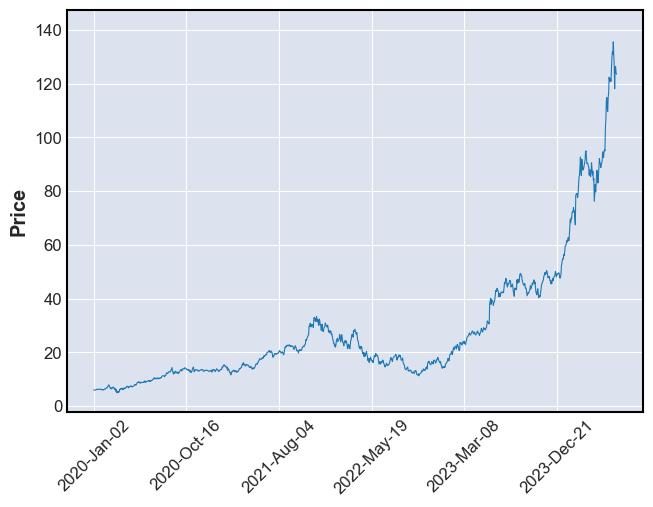

In [39]:
### plotting stock data
import mplfinance as mpf
df = yf.Ticker('NVDA').history( start='2020-01-01', end='2024-07-01')
mpf.plot(df, type='line')#,type='candle')#,style='yahoo',volume=True)

In [40]:
spy = yf.Ticker('SPY')

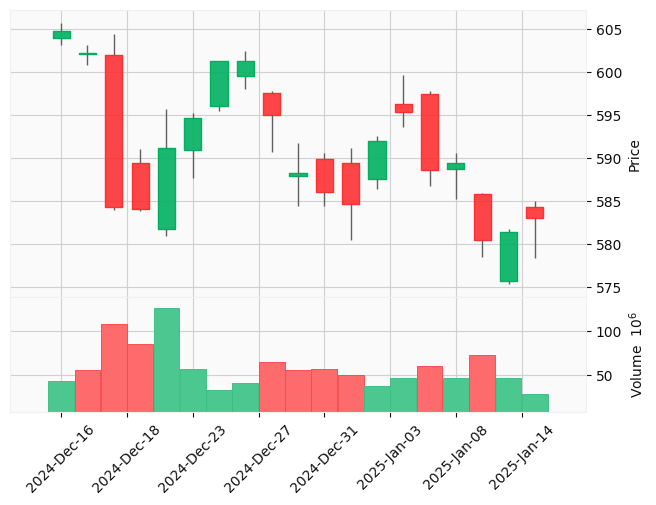

In [41]:
mpf.plot(spy.history(),type='candle',style='yahoo',volume=True)

In [77]:
# funds: S&P500, FTSEALL, STOXX600, NIKKEI225, 7-10 year US bonds, 30yr US bonds #FTSE100
ticker_list = ['SPY','FTAL.L','S600.L','EWJ', 'IEF']#'VUKE.L']

In [88]:
# tickers = yf.Tickers('msft aapl goog')
tickers = yf.Tickers('SPY FTAL.L S600.L EWJ IEF ^TYX')
tickers.tickers['FTAL.L'].history(period="1mo") # in UK £

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-16 00:00:00+00:00,69.250000,70.220001,68.929626,69.089996,10221,0.0,0.0,0.0
2024-12-17 00:00:00+00:00,68.440002,68.599998,68.269997,68.360001,8070,0.0,0.0,0.0
2024-12-18 00:00:00+00:00,68.570000,68.709999,68.260002,68.320000,5520,0.0,0.0,0.0
2024-12-19 00:00:00+00:00,68.000000,68.000000,67.437332,67.709999,7086,0.0,0.0,0.0
2024-12-20 00:00:00+00:00,67.669998,67.757401,66.949997,67.510002,20773,0.0,0.0,0.0
2024-12-23 00:00:00+00:00,67.839996,67.849998,67.400002,67.660004,2055,0.0,0.0,0.0
2024-12-24 00:00:00+00:00,68.220001,68.379997,67.839996,68.089996,1203,0.0,0.0,0.0
2024-12-27 00:00:00+00:00,67.839996,68.279999,67.834602,68.055000,15045,0.0,0.0,0.0
2024-12-30 00:00:00+00:00,68.080002,68.080002,67.669998,67.875000,2369,0.0,0.0,0.0


In [89]:
tickers.tickers['SPY'].info

{'longBusinessSummary': 'The trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index, with the weight of each stock in the portfolio substantially corresponding to the weight of such stock in the index.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 581.39,
 'open': 584.36,
 'dayLow': 578.35,
 'dayHigh': 585.0,
 'regularMarketPreviousClose': 581.39,
 'regularMarketOpen': 584.36,
 'regularMarketDayLow': 578.35,
 'regularMarketDayHigh': 585.0,
 'trailingPE': 26.925505,
 'volume': 39392038,
 'regularMarketVolume': 39392038,
 'averageVolume': 46872127,
 'averageVolume10days': 54282320,
 'averageDailyVolume10Day': 54282320,
 'bid': 580.42,
 'ask': 580.3,
 'bidSize': 800,
 'askSize': 800,
 'yield': 0.0121,
 'totalAssets': 623795240960,
 'fiftyTwoWeekLow': 469.87,
 'fiftyTwoWeekHigh': 609.07,
 'fiftyDayAverage': 593.7406,
 'twoHundredDayAverage': 556.3025,
 'trailingAnnualDividendRate': 5.662,
 'trailingAnnualDividendY

In [90]:
tickers.tickers['FTAL.L'].info

{'phone': '+353 1 776 3000',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 68.16,
 'open': 68.24,
 'dayLow': 68.02,
 'dayHigh': 68.2661,
 'regularMarketPreviousClose': 68.16,
 'regularMarketOpen': 68.24,
 'regularMarketDayLow': 68.02,
 'regularMarketDayHigh': 68.2661,
 'trailingPE': 0.15855384,
 'volume': 1359,
 'regularMarketVolume': 1359,
 'averageVolume': 9677,
 'averageVolume10days': 14237,
 'averageDailyVolume10Day': 14237,
 'bid': 67.86,
 'ask': 67.99,
 'totalAssets': 485574816,
 'fiftyTwoWeekLow': 54.6595,
 'fiftyTwoWeekHigh': 70.6,
 'fiftyDayAverage': 68.4026,
 'twoHundredDayAverage': 67.884575,
 'navPrice': 68.01424,
 'currency': 'GBP',
 'ytdReturn': -0.0027798,
 'beta3Year': 0.98,
 'fundFamily': 'State Street Global Advisors Europe Limited',
 'fundInceptionDate': 1524700800,
 'legalType': 'Exchange Traded Fund',
 'threeYearAverageReturn': 0.0496387,
 'fiveYearAverageReturn': 0.0435921,
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'FTAL.L',
 'underlyingSymbol': '

In [91]:
tickers.tickers['S600.L'].info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 10393.0,
 'open': 10481.662,
 'dayLow': 10446.0,
 'dayHigh': 10481.662,
 'regularMarketPreviousClose': 10393.0,
 'regularMarketOpen': 10481.662,
 'regularMarketDayLow': 10446.0,
 'regularMarketDayHigh': 10481.662,
 'volume': 271,
 'regularMarketVolume': 271,
 'averageVolume': 1933,
 'averageVolume10days': 1228,
 'averageDailyVolume10Day': 1228,
 'bid': 10428.0,
 'ask': 10436.0,
 'totalAssets': 462375008,
 'fiftyTwoWeekLow': 9504.864,
 'fiftyTwoWeekHigh': 10864.0,
 'fiftyDayAverage': 10308.04,
 'twoHundredDayAverage': 10477.895,
 'currency': 'GBp',
 'fundFamily': 'Invesco Investment Management Limited',
 'fundInceptionDate': 1238544000,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'S600.L',
 'underlyingSymbol': 'S600.L',
 'shortName': 'INVESCO MARKETS PLC INVESCO STO',
 'longName': 'Invesco STOXX Europe 600 UCITS ETF',
 'firstTradeDateEpochUtc': 1404370800,
 'timeZoneFullName': 'Europe/Lond

In [92]:
tickers.tickers['EWJ'].info

{'longBusinessSummary': 'The fund generally will invest at least 80% of its assets in the component securities of its underlying index and in investments that have economic characteristics that are substantially identical to the component securities of its underlying index. The underlying index is designed to measure the performance of the large- and mid-capitalization segments of the Japanese equity market.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 65.42,
 'open': 65.19,
 'dayLow': 64.97,
 'dayHigh': 65.45,
 'regularMarketPreviousClose': 65.42,
 'regularMarketOpen': 65.19,
 'regularMarketDayLow': 64.97,
 'regularMarketDayHigh': 65.45,
 'trailingPE': 15.138382,
 'volume': 2741822,
 'regularMarketVolume': 2741822,
 'averageVolume': 4257218,
 'averageVolume10days': 3979000,
 'averageDailyVolume10Day': 3979000,
 'bid': 65.25,
 'ask': 65.27,
 'bidSize': 900,
 'askSize': 1200,
 'yield': 0.0235,
 'totalAssets': 13196284928,
 'fiftyTwoWeekLow': 60.62,
 'fiftyTwoWeekHigh': 73.24,


In [93]:
tickers.tickers['IEF'].info

{'phone': '1-800-474-2737',
 'longBusinessSummary': 'The underlying index measures the performance of public obligations of the U.S. Treasury that have a remaining maturity of greater than or equal to seven years and less than ten years. The fund will invest at least 80% of its assets in the component securities of the underlying index, and the fund will invest at least 90% of its assets in U.S. Treasury securities that the advisor believes will help the fund track the underlying index.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 91.17,
 'open': 91.2,
 'dayLow': 91.08,
 'dayHigh': 91.28,
 'regularMarketPreviousClose': 91.17,
 'regularMarketOpen': 91.2,
 'regularMarketDayLow': 91.08,
 'regularMarketDayHigh': 91.28,
 'volume': 3761952,
 'regularMarketVolume': 3761952,
 'averageVolume': 6636860,
 'averageVolume10days': 5142570,
 'averageDailyVolume10Day': 5142570,
 'bid': 91.18,
 'ask': 91.19,
 'bidSize': 1700,
 'askSize': 100,
 'yield': 0.036199998,
 'totalAssets': 31385524224

In [95]:
tickers.tickers['^TYX'].info

{'maxAge': 86400,
 'priceHint': 4,
 'previousClose': 4.986,
 'open': 4.9779997,
 'dayLow': 4.95,
 'dayHigh': 5.005,
 'regularMarketPreviousClose': 4.986,
 'regularMarketOpen': 4.9779997,
 'regularMarketDayLow': 4.95,
 'regularMarketDayHigh': 5.005,
 'fiftyTwoWeekLow': 3.717,
 'fiftyTwoWeekHigh': 5.152,
 'fiftyDayAverage': 4.5123,
 'twoHundredDayAverage': 4.44611,
 'currency': 'USD',
 'exchange': 'CGI',
 'quoteType': 'INDEX',
 'symbol': '^TYX',
 'underlyingSymbol': '^TYX',
 'shortName': 'Treasury Yield 30 Years',
 'longName': 'Treasury Yield 30 Years',
 'firstTradeDateEpochUtc': 224860800,
 'timeZoneFullName': 'America/Chicago',
 'timeZoneShortName': 'CST',
 'uuid': 'f1d0599a-7a4a-3eeb-b5d0-878f91d868f5',
 'messageBoardId': 'finmb_INDEXTYX',
 'gmtOffSetMilliseconds': -21600000,
 'trailingPegRatio': None}

### Currencies

In [67]:
start = '2020-07-01'
end = '2021-01-01'

rates = ['USDGBP=X', 'GBPEUR=X']
tickers = yf.Tickers(' '.join(rates))

exchange_rates = []
for i in tickers.tickers:
    exchange_rates.append(tickers.tickers[i].history(start=start, end=end).Close)

In [68]:
exchange_rates[1]

Date
2020-07-01 00:00:00+01:00    1.10250
2020-07-02 00:00:00+01:00    1.10769
2020-07-03 00:00:00+01:00    1.10920
2020-07-06 00:00:00+01:00    1.10880
2020-07-07 00:00:00+01:00    1.10443
                              ...   
2020-12-25 00:00:00+00:00    1.11230
2020-12-28 00:00:00+00:00    1.11185
2020-12-29 00:00:00+00:00    1.10170
2020-12-30 00:00:00+00:00    1.10150
2020-12-31 00:00:00+00:00    1.10803
Name: Close, Length: 132, dtype: float64

### Bond etf

In [96]:
# https://www.kaggle.com/code/asimislam/30-yrs-plots-of-market-data

In [85]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2].Symbol

In [86]:
df_prices_all = yf.download(tickers.to_list(), start='2020-01-01', interval='1d')

[*********************100%***********************]  101 of 101 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [87]:
df_prices_all

Price      Adj Close       Close                                      \
Ticker         BRK.B        AAPL        ABBV         ABT         ACN   
Date                                                                   
2020-01-02       NaN   72.796013   72.264885   79.689941  195.263565   
2020-01-03       NaN   72.088295   71.578949   78.718468  194.938385   
2020-01-06       NaN   72.662720   72.143845   79.130875  193.665405   
2020-01-07       NaN   72.320984   71.732262   78.690964  189.484192   
2020-01-08       NaN   73.484352   72.240669   79.011749  189.855881   
...              ...         ...         ...         ...         ...   
2025-01-07       NaN  242.210007  179.529999  113.400002  356.390015   
2025-01-08       NaN  242.699997  178.500000  114.250000  357.730011   
2025-01-10       NaN  236.850006  175.169998  112.309998  349.790009   
2025-01-13       NaN  234.399994  176.740005  113.190002  349.140015   
2025-01-14       NaN         NaN  174.970001  112.695000  348.029999   

Price                                                                  ...  \
Ticker            ADBE        AIG         AMD        AMGN         AMT  ...   
Date                                                                   ...   
2020-01-02  334.429993  45.233284   49.099998  206.104706  200.433929  ...   
2020-01-03  331.809998  44.883709   48.599998  204.705490  200.530411  ...   
2020-01-06  333.709991  44.918682   48.389999  206.276382  200.477814  ...   
2020-01-07  333.390015  44.665245   48.250000  204.336349  196.205948  ...   
2020-01-08  337.869995  45.189587   47.830002  204.490875  197.907654  ...   
...                ...        ...         ...         ...         ...  ...   
2025-01-07  422.630005  72.589996  127.330002  262.059998  177.169998  ...   
2025-01-08  419.579987  71.430000  121.839996  264.209991  179.190002  ...   
2025-01-10  405.920013  70.500000  116.040001  262.230011  173.460007  ...   
2025-01-13  408.500000  70.839996  117.320000  270.190002  176.940002  ...   
2025-01-14  410.394989  72.470001  115.196404  267.299988  179.020004  ...   

Price        Volume                                                          \
Ticker          TXN      UNH      UNP      UPS      USB         V        VZ   
Date                                                                          
2020-01-02  4614000  2543400  2444800  4158100  5002100   8733000  11447900   
2020-01-03  4057200  2711400  2344200  2477800  5161800   4899700  13263200   
2020-01-06  4345400  3079100  3142500  3381600  6869200  10109500  15094500   
2020-01-07  7184100  2492900  4096400  1952300  4006800   4392300  14293100   
2020-01-08  3546900  3379200  2817500  2016000  5627500   5712000  15926500   
...             ...      ...      ...      ...      ...       ...       ...   
2025-01-07  5035200  3914500  2752700  3725300  6014300   4958600  31517100   
2025-01-08  4230400  4141700  2062800  4536300  5955500   5161600  22901600   
2025-01-10  7223500  5467500  2711300  5231800  8528500   6660100  27338400   
2025-01-13  4799600  6472500  2278100  6939200  9164700   9568400  19734000   
2025-01-14  2353039  2902365  1084220  2121322  5906497   3248232  11502929   

Price                                       
Ticker             WFC       WMT       XOM  
Date                                        
2020-01-02  16803100.0  20294700  12456400  
2020-01-03  15608800.0  16197600  17386900  
2020-01-06  13200300.0  19336500  20081900  
2020-01-07  13278600.0  20540700  17387700  
2020-01-08  16585600.0  17627400  15137700  
...                ...       ...       ...  
2025-01-07  13522000.0  11238000  12625900  
2025-01-08  16544700.0  13453600  17858100  
2025-01-10  14466600.0  18140900  19304500  
2025-01-13  10439800.0  18617100  17073400  
2025-01-14         NaN   9119646   6733915  

[1266 rows x 506 columns]

### multiple ticker download

In [43]:
data = yf.download(ticker_list, period='1mo')
data.head()

[*********************100%***********************]  4 of 4 completed


Price           Close                                       High             \
Ticker            EWJ     FTAL.L   S600.L         SPY        EWJ     FTAL.L   
Date                                                                          
2024-12-16  68.116005  69.089996  10391.0  604.754578  68.273540  70.220001   
2024-12-17  67.879997  68.360001  10339.0  602.262939  68.110001  68.599998   
2024-12-18  66.180000  68.320000  10340.0  584.313416  68.000000  68.709999   
2024-12-19  66.389999  67.709999  10199.0  584.133972  66.900002  68.000000   
2024-12-20  66.209999  67.510002  10144.0  591.150024  66.839996  67.757401   

Price                                       Low                           \
Ticker            S600.L         SPY        EWJ     FTAL.L        S600.L   
Date                                                                       
2024-12-16  10502.000000  605.741308  67.997848  68.929626  10396.000000   
2024-12-17  10360.000000  603.139992  67.739998  68.269997  10324.000000   
2024-12-18  10364.000000  604.375836  66.150002  68.260002  10340.000000   
2024-12-19  10226.000000  591.010851  66.120003  67.437332  10166.000000   
2024-12-20  10145.447266  595.750000  65.720001  66.949997  10039.461914   

Price                        Open                                       \
Ticker             SPY        EWJ     FTAL.L        S600.L         SPY   
Date                                                                     
2024-12-16  603.179921  68.017544  69.250000  10502.000000  603.967249   
2024-12-17  600.867672  67.800003  68.440002  10328.000000  602.163299   
2024-12-18  583.924709  67.889999  68.570000  10364.000000  601.953994   
2024-12-19  583.884811  66.820000  68.000000  10198.000000  589.376338   
2024-12-20  580.909973  65.730003  67.669998  10145.447266  581.770020   

Price          Volume                                
Ticker            EWJ   FTAL.L  S600.L          SPY  
Date                                                 
2024-12-16  3234000.0  10221.0  1091.0   43695200.0  
2024-12-17  3230800.0   8070.0   388.0   55773500.0  
2024-12-18  4300800.0   5520.0   599.0  108248700.0  
2024-12-19  4716000.0   7086.0  1068.0   85919500.0  
2024-12-20  5425500.0  20773.0   395.0  125716700.0

In [52]:
# ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

In [327]:
nikkei_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-16 00:00:00-05:00,65.006347,65.074764,64.302624,64.449234,11987500,0.0,0.0,0.0
2024-01-17 00:00:00-05:00,63.481611,63.667318,63.286136,63.647774,10639400,0.0,0.0,0.0
2024-01-18 00:00:00-05:00,63.911663,64.263525,63.872567,64.243980,11142900,0.0,0.0,0.0
2024-01-19 00:00:00-05:00,64.077824,64.410141,63.804155,64.410141,11184400,0.0,0.0,0.0
2024-01-22 00:00:00-05:00,65.055211,65.338655,64.986794,65.172501,8696500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-01-06 00:00:00-05:00,67.430000,67.870003,67.339996,67.430000,5238700,0.0,0.0,0.0
2025-01-07 00:00:00-05:00,67.879997,67.940002,67.180000,67.269997,4052300,0.0,0.0,0.0
2025-01-08 00:00:00-05:00,66.830002,67.150002,66.669998,67.099998,3607300,0.0,0.0,0.0


In [323]:
pd.concat([spy_df,footsie_df,stoxx_df,nikkei_df], axis=0)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-16 00:00:00-05:00,469.240907,470.573785,467.068758,468.915070,85014900,0.0,0.0,0.0
2024-01-17 00:00:00-05:00,465.844484,466.802200,463.919168,466.308533,68843900,0.0,0.0,0.0
2024-01-18 00:00:00-05:00,468.006720,471.018080,466.436861,470.455292,91856200,0.0,0.0,0.0
2024-01-19 00:00:00-05:00,471.600608,476.606404,470.504680,476.320068,110733300,0.0,0.0,0.0
2024-01-22 00:00:00-05:00,477.880145,479.074813,476.665712,477.327240,75844900,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-01-07 00:00:00+00:00,10356.000000,10390.000000,10330.000000,10409.000000,1402,0.0,0.0,0.0
2025-01-08 00:00:00+00:00,10386.000000,10432.000000,10386.000000,10428.000000,2609,0.0,0.0,0.0
2025-01-09 00:00:00+00:00,10520.000000,10520.000000,10510.000000,10514.000000,81,0.0,0.0,0.0


In [313]:
spy_df['daily_return'] = spy_df['Close'].pct_change()
# Drop the first row as it will have NaN value for daily return
df = df.dropna()

In [314]:
df['daily_return'].plot()

KeyError: 'daily_return'

Text(0.5, 1.0, 'S&P500 daily returns 10yrs')

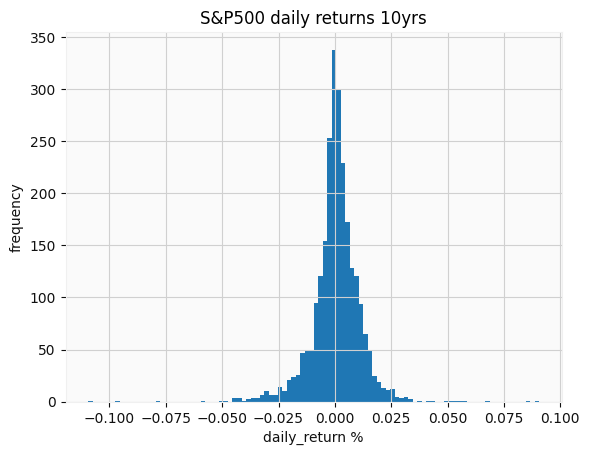

In [270]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df['daily_return'],bins=100)
plt.xlabel('daily_return %')
plt.ylabel('frequency')
plt.title('S&P500 daily returns 10yrs')

In [272]:
df['daily_return'].mean()
df['daily_return'].median()

0.0005985561538487394

### fit distributions

In [274]:
import scipy.stats as stats
import seaborn as sns

In [275]:
data = df['daily_return']

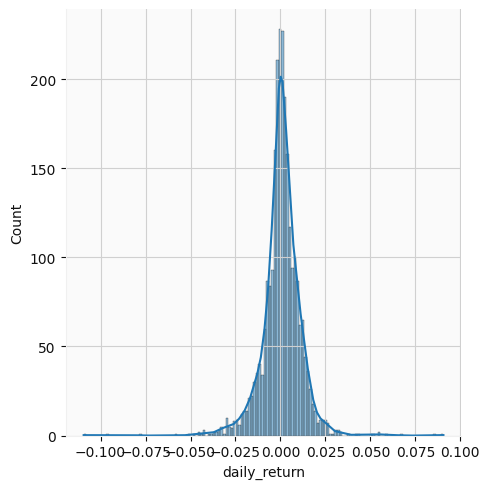

In [294]:
sns.displot(data, kde=True)
plt.show()

In [ ]:
# https://erdogant.github.io/distfit/pages/html/Examples.html#plot-rss

In [284]:
from distfit import distfit

In [285]:
# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(data)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 3568.62] [loc=0.001 scale=0.011]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 23986.2] [loc=-0.109 scale=0.110]
[distfit] >INFO> [pareto    ] [0.08 sec] [RSS: 23996.5] [loc=-4859418.993 scale=4859418.884]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 365.78] [loc=0.001 scale=0.007]
[distfit] >INFO> [t         ] [0.03 sec] [RSS: 604.779] [loc=0.001 scale=0.006]
[distfit] >INFO> [genextreme] [0.17 sec] [RSS: 25505.8] [loc=-0.008 scale=0.132]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 26105.7] [loc=-0.109 scale=2.010]
[distfit] >INFO> [lognorm   ] [0.10 sec] [RSS: 3571.42] [loc=-4.353 scale=4.353]
[distfit] >INFO> [beta      ] [0.10 sec] [RSS: 3527.39] [loc=-91.572 scale=92.221]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 22068.6] [loc=-0.109 scale=0.200]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 3507.17] [loc=-0.720 scale=0.141]
[distfit] >INFO> [norm      ] [0.68 sec] [RSS: 3568

{'model': {'name': 'dweibull',
  'score': 365.7796845763114,
  'loc': 0.0005904905389884087,
  'scale': 0.007055174692376698,
  'arg': (0.9431161202842117,),
  'params': (0.9431161202842117, 0.0005904905389884087, 0.007055174692376698),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x15ead1592b0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -0.016492757032931942,
  'CII_max_alpha': 0.01767373811090876},
 'summary':           name         score             loc           scale  \
 0     dweibull    365.779685         0.00059        0.007055   
 1            t    604.778712        0.000898        0.006408   
 2     loggamma   3507.172749       -0.720076        0.141382   
 3         beta   3527.386874      -91.571598       92.220844   
 4         norm   3568.623345        0.000552         0.01109   
 5      lognorm   3571.422035       -4.352592        4.353128   
 6      uniform  22068.594086       -0.109424        0.200027   
 7

In [286]:
# Print summary of evaluated distributions
print(dist.summary)

          name         score             loc           scale  \
0     dweibull    365.779685         0.00059        0.007055   
1            t    604.778712        0.000898        0.006408   
2     loggamma   3507.172749       -0.720076        0.141382   
3         beta   3527.386874      -91.571598       92.220844   
4         norm   3568.623345        0.000552         0.01109   
5      lognorm   3571.422035       -4.352592        4.353128   
6      uniform  22068.594086       -0.109424        0.200027   
7        expon  23986.173092       -0.109424        0.109976   
8       pareto   23996.48606 -4859418.993449  4859418.884025   
9   genextreme  25505.830761       -0.008111        0.132392   
10       gamma  26105.723424       -0.109424        2.010032   

                                        arg  \
0                     (0.9431161202842117,)   
1                     (2.6962627302155218,)   
2                     (164.03492546894967,)   
3   (482470.5215709516, 3417.8300182667363)

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Dweibull(loc:0.000590, scale:0.007055)


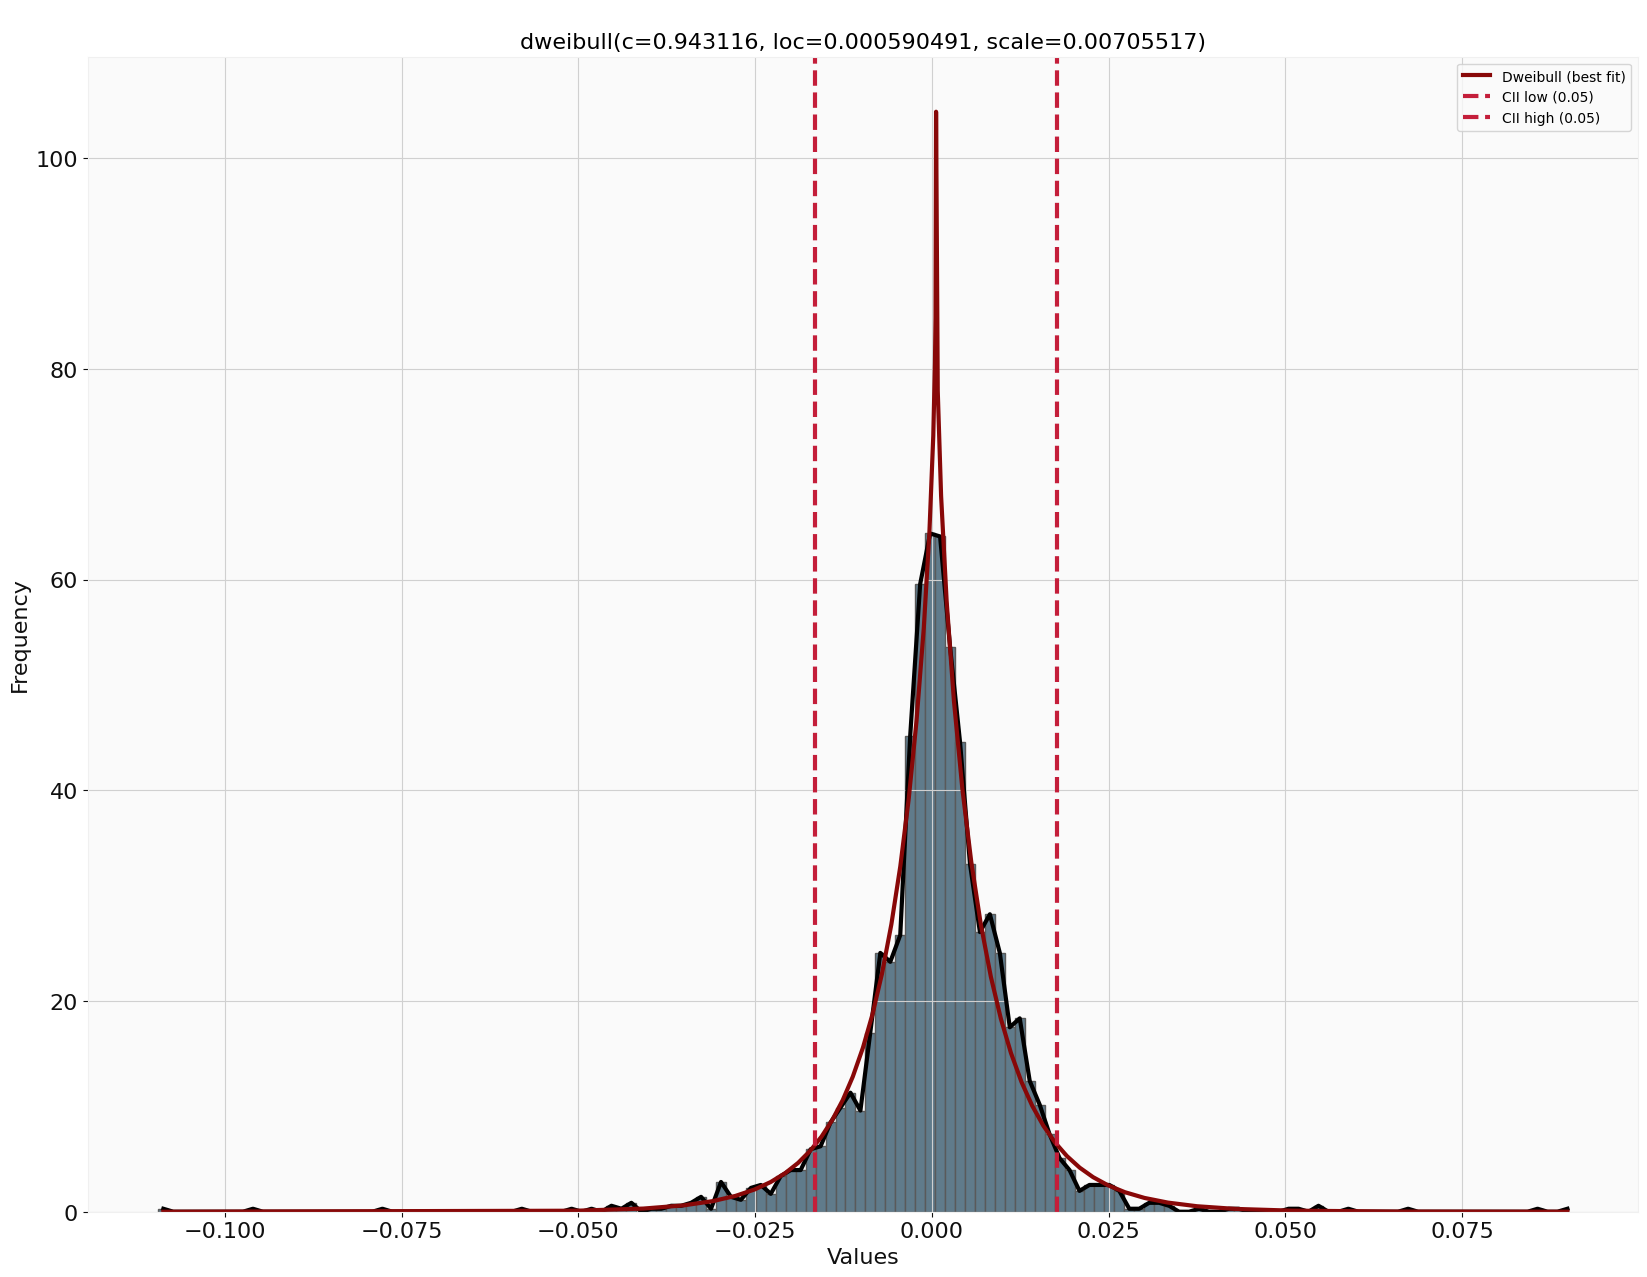

In [289]:
# Plot results
dist.plot()
plt.show()

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

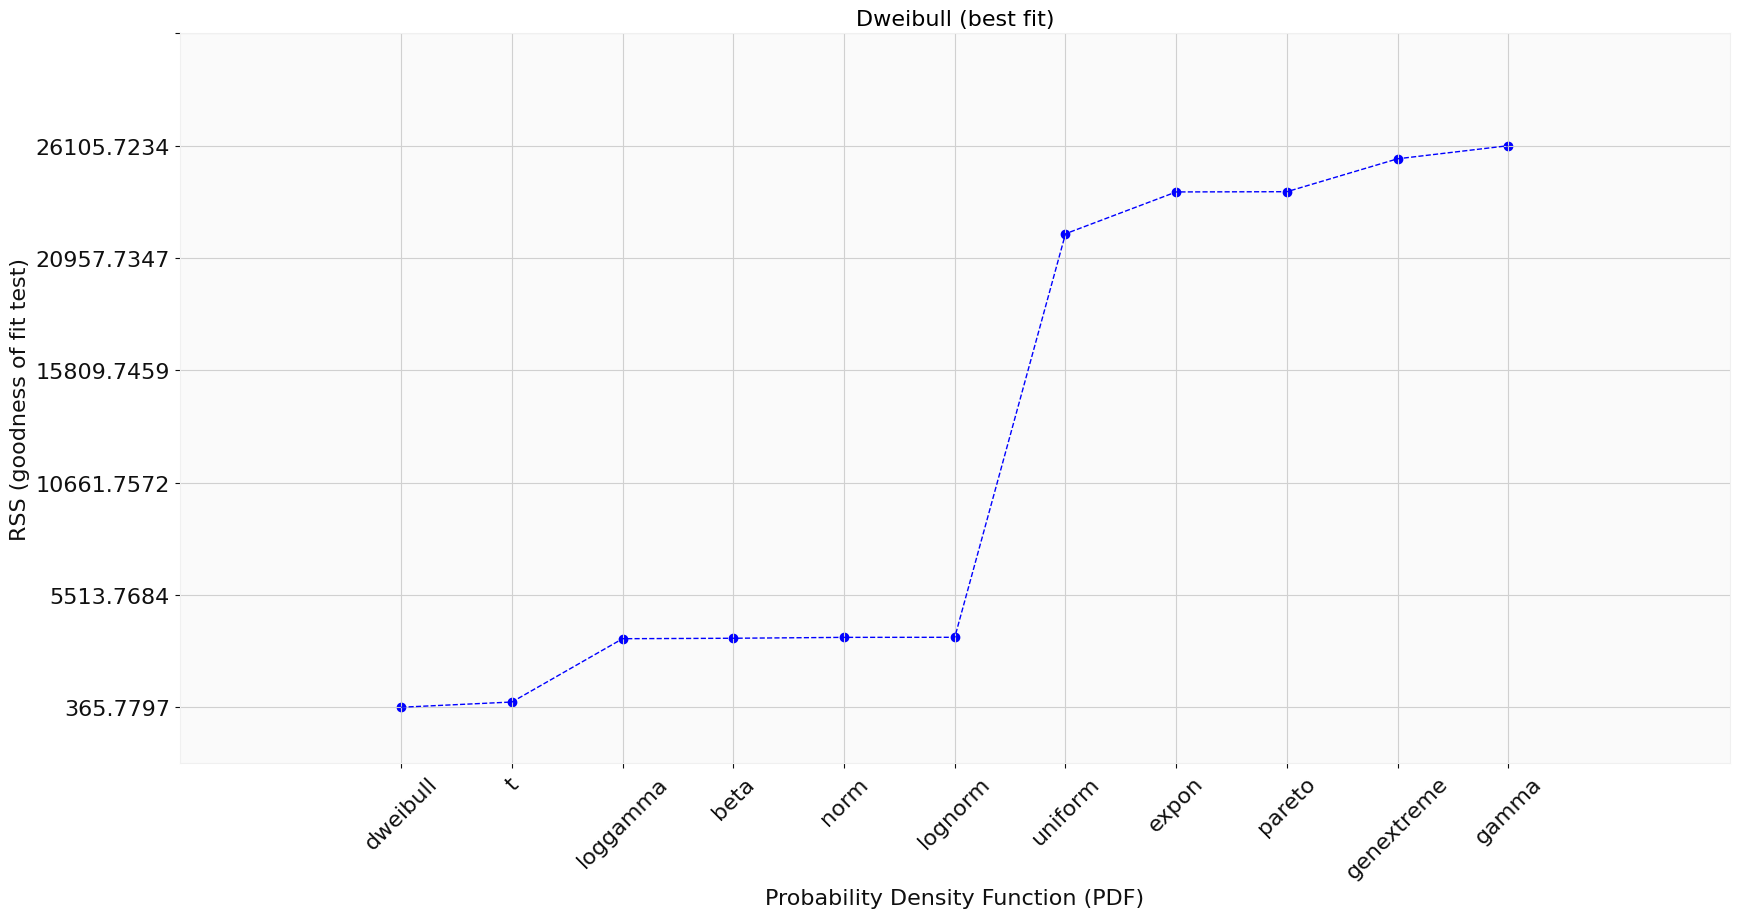

In [291]:
dist.plot_summary()

In [213]:
# get list of quotes
quotes = yf.Search("AAPL", max_results=10).quotes
quotes

[{'exchange': 'NMS',
  'shortname': 'Apple Inc.',
  'quoteType': 'EQUITY',
  'symbol': 'AAPL',
  'index': 'quotes',
  'score': 3970000.0,
  'typeDisp': 'Equity',
  'longname': 'Apple Inc.',
  'exchDisp': 'NASDAQ',
  'sector': 'Technology',
  'sectorDisp': 'Technology',
  'industry': 'Consumer Electronics',
  'industryDisp': 'Consumer Electronics',
  'dispSecIndFlag': True,
  'isYahooFinance': True},
 {'exchange': 'NGM',
  'shortname': 'Direxion Daily AAPL Bull 2X Sha',
  'quoteType': 'ETF',
  'symbol': 'AAPU',
  'index': 'quotes',
  'score': 20012.0,
  'typeDisp': 'ETF',
  'longname': 'Direxion Daily AAPL Bull 2X Shares',
  'exchDisp': 'NASDAQ',
  'isYahooFinance': True},
 {'exchange': 'OPR',
  'shortname': 'AAPL Dec 2025 70.000 call',
  'quoteType': 'OPTION',
  'symbol': 'AAPL251219C00070000',
  'index': 'quotes',
  'score': 20005.0,
  'typeDisp': 'Option',
  'longname': 'AAPL Dec 2025 70.000 call',
  'exchDisp': 'OPR',
  'isYahooFinance': True},
 {'exchange': 'OPR',
  'shortname': 'A

In [198]:
spy.funds_data.description

'The trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index, with the weight of each stock in the portfolio substantially corresponding to the weight of such stock in the index.'

In [199]:
spy.funds_data.sector_weightings

{'realestate': 0.021,
 'consumer_cyclical': 0.1142,
 'basic_materials': 0.0167,
 'consumer_defensive': 0.0552,
 'technology': 0.33720002,
 'communication_services': 0.0937,
 'financial_services': 0.13159999,
 'utilities': 0.0251,
 'industrials': 0.0726,
 'energy': 0.031600002,
 'healthcare': 0.101}

In [200]:
spy.funds_data.asset_classes

{'cashPosition': 0.0031,
 'stockPosition': 0.997,
 'bondPosition': 0.0,
 'preferredPosition': 0.0,
 'convertiblePosition': 0.0,
 'otherPosition': 0.0}

In [201]:
spy.funds_data.bond_holdings

,SPY,Category Average
Average,,
Duration,<NA>,<NA>
Maturity,<NA>,<NA>
Credit Quality,<NA>,<NA>


In [202]:
spy.funds_data.bond_ratings

{'us_government': 0.0}

In [173]:
import yfinance as yf
import pandas as pd

tickerStrings = ['AAPL', 'MSFT']
df_list = []
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker")
    data['ticker'] = ticker  # Add ticker column
    df_list.append(data)

# Combine all dataframes into a single dataframe
df = pd.concat(df_list)
df.to_csv('ticker.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [174]:
df

Ticker          AAPL                                            ticker  \
Price           Open      High       Low     Close       Volume          
Date                                                                     
1980-12-12  0.098834  0.099264  0.098834  0.098834  469033600.0   AAPL   
1980-12-15  0.094108  0.094108  0.093678  0.093678  175884800.0   AAPL   
1980-12-16  0.087232  0.087232  0.086802  0.086802  105728000.0   AAPL   
1980-12-17  0.088951  0.089381  0.088951  0.088951   86441600.0   AAPL   
1980-12-18  0.091530  0.091959  0.091530  0.091530   73449600.0   AAPL   
...              ...       ...       ...       ...          ...    ...   
2025-01-03       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-06       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-07       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-08       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-10       NaN       NaN       NaN       NaN          NaN   MSFT   

Ticker            MSFT                                                  
Price             Open        High         Low       Close      Volume  
Date                                                                    
1980-12-12         NaN         NaN         NaN         NaN         NaN  
1980-12-15         NaN         NaN         NaN         NaN         NaN  
1980-12-16         NaN         NaN         NaN         NaN         NaN  
1980-12-17         NaN         NaN         NaN         NaN         NaN  
1980-12-18         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2025-01-03  421.079987  424.029999  419.540009  423.350006  16662900.0  
2025-01-06  428.000000  434.320007  425.480011  427.850006  20573600.0  
2025-01-07  429.000000  430.649994  420.799988  422.369995  18139100.0  
2025-01-08  423.459991  426.970001  421.540009  424.559998  15054600.0  
2025-01-10  424.630005  424.709991  415.019989  418.950012  20186800.0  

[20896 rows x 11 columns]

In [214]:
tech = yf.Sector('technology')
software = yf.Industry('software-infrastructure')

# Common information
tech.key
tech.name
tech.symbol
tech.ticker
tech.overview
tech.top_companies
tech.research_reports

# Sector information
tech.top_etfs
tech.top_mutual_funds
tech.industries

# Industry information
software.sector_key
software.sector_name
software.top_performing_companies
software.top_growth_companies

,name,ytd return,growth estimate
symbol,,,
CFLT,"Confluent, Inc.",-0.0114,5.500000
AVDX,"AvidXchange Holdings, Inc.",-0.0687,3.000000
OSPN,OneSpan Inc.,-0.0140,2.000000
GB,Global Blue Group Holding AG,0.0750,1.809818
IOT,Samsara Inc.,0.0021,1.428571


In [215]:
tech.top_etfs

{'VGT': 'Vanguard Information Tech ETF',
 'XLK': 'SPDR Select Sector Fund - Techn',
 'SMH': 'VanEck Semiconductor ETF',
 'IYW': 'iShares U.S. Technology ETF',
 'SOXX': 'iShares Semiconductor ETF',
 'FTEC': 'Fidelity MSCI Information Techn',
 'SOXL': 'Direxion Daily Semiconductor Bu',
 'IGV': 'iShares Expanded Tech-Software ',
 'FNGU': 'MicroSectors FANG  Index 3X Lev',
 'CIBR': 'First Trust NASDAQ Cybersecurit'}

In [216]:
tech.top_companies

,name,rating,market weight
symbol,,,
AAPL,Apple Inc.,Buy,0.189498
NVDA,NVIDIA Corporation,Buy,0.176273
MSFT,Microsoft Corporation,Buy,0.164758
AVGO,Broadcom Inc.,Buy,0.055418
ORCL,Oracle Corporation,Buy,0.022647
CRM,"Salesforce, Inc.",Buy,0.016090
CSCO,"Cisco Systems, Inc.",Buy,0.012375
ACN,Accenture plc,Buy,0.011562
NOW,"ServiceNow, Inc.",Buy,0.011182
